In [40]:
# Here I'm testing the encoder trained on Zimmermann's code

%load_ext autoreload
%autoreload 2

import torch
import invertible_network_utils

from data.encoder import SphereEncoder
import encoders

from sampling.sampling import sample_on_sphere_uniform, sample_conditional

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


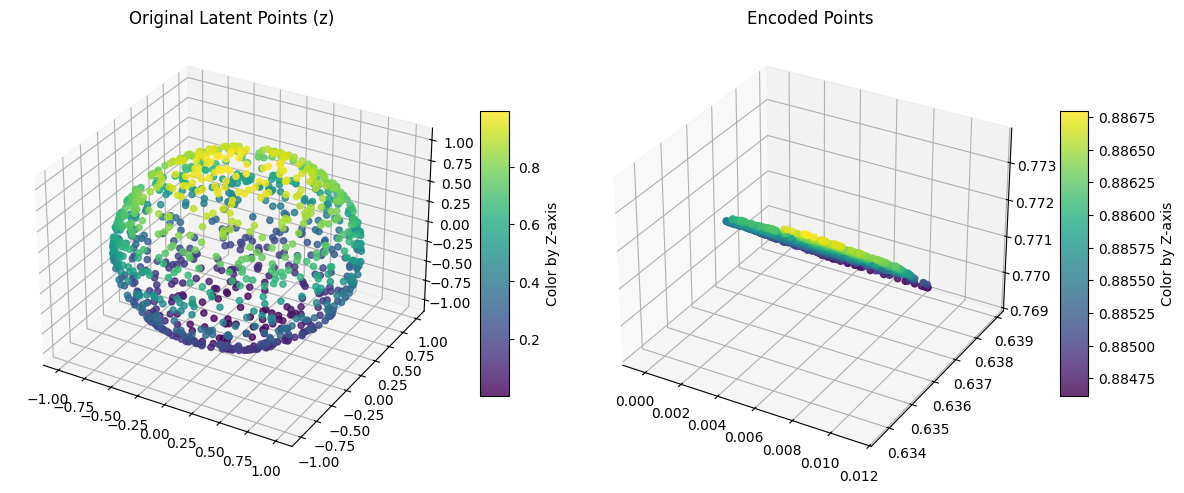

In [41]:
# Testing the unloaded encoder 

f = encoders.get_mlp(
    n_in=3,
    n_out=3,
    layers=[
        3 * 10,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 10,
    ],
    output_normalization="fixed_sphere",
)
f = f.to("cpu")

g = torch.nn.Identity()
g = g.to("cpu")

z_reference = torch.nn.functional.normalize(torch.randn((number_of_samples, latent_dimension)))

out = g(z_reference)
enc = f(out)

def visualize_spheres_side_by_side(original_latents, encoded_latents):
    z_3d = original_latents[:, :3].detach().numpy()
    encoded_data_3d = encoded_latents[:, :3].detach().numpy()
    
    c_original = 0.5 * z_3d[:, 2] + 0.5
    c_encoded = 0.5 * encoded_data_3d[:, 2] + 0.5

    fig = plt.figure(figsize=(12, 6))
    
    # Original points
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(z_3d[:, 0], z_3d[:, 1], z_3d[:, 2], 
                            c=c_original, cmap='viridis', s=20, alpha=0.8)
    ax1.set_title('Original Latent Points (z)')
    fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=10, label='Color by Z-axis')

    # Encoded points
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(encoded_data_3d[:, 0], encoded_data_3d[:, 1], encoded_data_3d[:, 2], 
                            c=c_encoded, cmap='viridis', s=20, alpha=0.8)
    ax2.set_title('Encoded Points')
    fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=10, label='Color by Z-axis')

    plt.tight_layout()
    plt.show()

visualize_spheres_side_by_side(z_reference, enc)

tensor([[ 0.7596, -0.6241, -0.1832],
        [-0.7916,  0.3496, -0.5012],
        [ 0.9798,  0.1789,  0.0899],
        ...,
        [ 0.8544, -0.3519, -0.3824],
        [ 0.4103, -0.8409,  0.3529],
        [ 0.9568, -0.2740,  0.0974]])


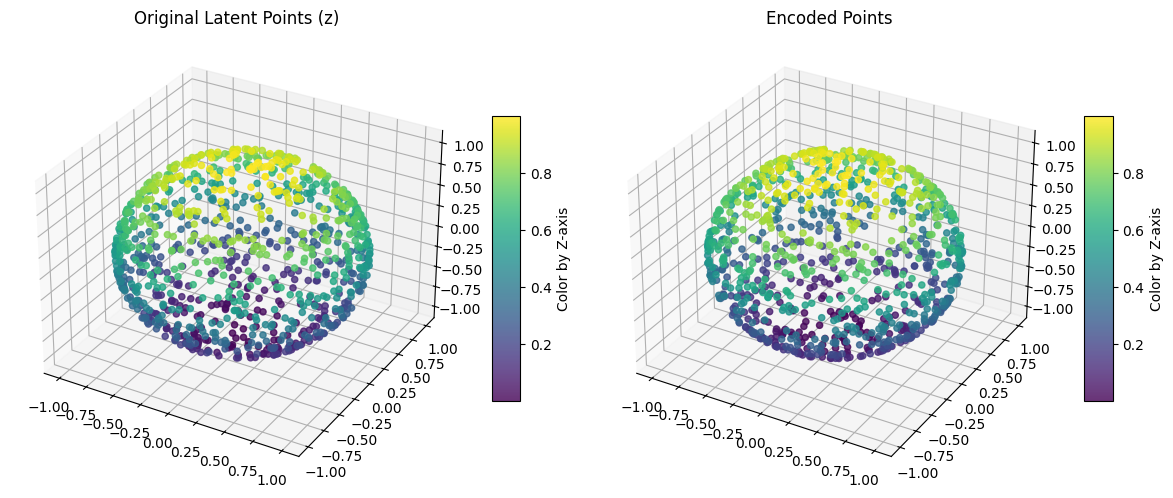

In [42]:
generator_path = './archive/Zimmermann/g.pth'
encoder_path = 'checkpoints/unsup_step_2000.pth'

# g.load_state_dict(torch.load(generator_path, weights_only=True))

f.load_state_dict(torch.load(encoder_path, weights_only=False)['model_state_dict'])

number_of_samples = 1000
latent_dimension = 3

# z_reference = sample_on_sphere_uniform(number_of_samples, latent_dimension)

z_reference = torch.nn.functional.normalize(torch.randn((number_of_samples, latent_dimension)))

print(z_reference)

out = g(z_reference)
enc = f(out)

# visualize_spheres_side_by_side(z_reference, enc)
visualize_spheres_side_by_side(z_reference, enc)